# Exercice: agrégation
Nous verrons ici comment agréger une table input-output. Différentes raisons peuvent pousser à agréger/désagréger une table existante, notamment afin de la faire correspondre à un jeu de données externe (avec une classification différente) ou encore d'effectuer les calculs plus rapidement (la complexité augmente avec le carré de la résolution).

In [2]:
import pymrio as mr   # manipulation des données input-output
import pandas as pd   # manipulation de tables et jeux de données
import numpy as np    # opérations communes
import seaborn as sns # production de figures, add-on à matplotlib
import matplotlib.pyplot as plt # production de figures
import os # opérations sur le système de fichiers

from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle

In [3]:
# Si vous voulez enregistrer/charger rapidement
import pickle

In [4]:
year = 2019
EXIOBASE_PATH = '../EXIOBASE/' # ne pas hésiter à changer

In [5]:
# Chargement rapide des données IO
with open(EXIOBASE_PATH + f'IOT_{year}_ixi.pickle', 'rb') as handle:
    io = pickle.load(handle)

In [6]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Agrégation des secteurs

In [7]:
# Chargement du fichier de correspondance pour les secteurs
sec_agg_raw = pd.read_excel('data/NACE2full_EXIOBASEp.xlsx')

In [8]:
sec_agg_raw_lvl1 = sec_agg_raw[sec_agg_raw['Level']==1].drop(['Unnamed: 2','Unnamed: 3','Level'], axis=1)

sec_agg = sec_agg_raw_lvl1.set_index('Code').stack().droplevel(1)

sec_agg_dict = {v:k for k,v in sec_agg.items()}

# Les libellés ne sont pas exactement les mêmes dans le fichier importé...
sec_agg_dict['Manure treatment (conventional), storage and land application'] = sec_agg_dict['Manure treatment (conventional) and land application']
sec_agg_dict['Manure treatment (biogas), storage and land application'] = sec_agg_dict['Manure treatment (biogas) and land application']
sec_agg_dict['Re-processing of secondary wood material into new wood material'] = sec_agg_dict['Woodwaste']
sec_agg_dict['Re-processing of secondary paper into new pulp'] = sec_agg_dict['Recycling of waste paper']
sec_agg_dict['Re-processing of secondary plastic into new plastic'] = sec_agg_dict['Recycling of plastics waste']
sec_agg_dict['Re-processing of secondary glass into new glass'] = sec_agg_dict['Recycling of waste and scrap']
sec_agg_dict['Re-processing of secondary aluminium into new aluminium'] = sec_agg_dict['Recycling of aluminium waste']
sec_agg_dict['Re-processing of secondary copper into new copper'] = sec_agg_dict['Recycling of copper waste']
sec_agg_dict['Re-processing of secondary lead into new lead, zinc and tin'] = sec_agg_dict['Recycling of lead, zinc and tin waste']
sec_agg_dict['Re-processing of secondary other non-ferrous metals into new other non-ferrous metals'] = sec_agg_dict['Recycling of aluminium waste']
sec_agg_dict['Re-processing of secondary plastic into new plastic'] = sec_agg_dict['Recycling of waste and scrap']
sec_agg_dict['Re-processing of secondary preciuos metals into new preciuos metals'] = sec_agg_dict['Recycling of pecious metals waste']
sec_agg_dict['Re-processing of secondary steel into new steel'] = sec_agg_dict['Recycling of steel scrap']
sec_agg_dict['Re-processing of secondary construction material into aggregates'] = sec_agg_dict['Recycling of construction waste']
sec_agg_dict['Recycling of bottles by direct reuse'] = sec_agg_dict['Glass bottles directly reused']
sec_agg_dict['Re-processing of ash into clinker'] = sec_agg_dict['Glass bottles directly reused']
sec_agg_dict['Biogasification of food waste, incl. land application'] = sec_agg_dict['Biogasification of food waste']
sec_agg_dict['Biogasification of paper, incl. land application'] = sec_agg_dict['Biogasification of paper']
sec_agg_dict['Biogasification of sewage slugde, incl. land application'] = sec_agg_dict['Biogasification of sewage slugde']
sec_agg_dict['Composting of food waste, incl. land application'] = sec_agg_dict['Composting of food waste']
sec_agg_dict['Composting of paper and wood, incl. land application'] = sec_agg_dict['Composting of paper and wood']

# Ces trois là sont des approximations, mais la catégorie principale est la même (NACE "E")
sec_agg_dict['Landfill of waste: Inert/metal/hazardous'] = sec_agg_dict['Incineration of waste: Metals and Inert materials']
sec_agg_dict['Landfill of waste: Textiles'] = sec_agg_dict['Incineration of waste: Textiles']
sec_agg_dict['Landfill of waste: Wood'] = sec_agg_dict['Incineration of waste: Wood']


## Agrégation des régions

In [9]:
# Paramètres de l'agrégation pour les pays
reg_agg_dict = dict(zip(io.get_regions(), ['EU28'] * 28 + ['RoW'] * 21))

for c in ['LU', 'BE', 'FR', 'DE', 'NL', 'CH']:
    reg_agg_dict[c] = c

In [10]:
reg_agg_dict

{'AT': 'EU28',
 'BE': 'BE',
 'BG': 'EU28',
 'CY': 'EU28',
 'CZ': 'EU28',
 'DE': 'DE',
 'DK': 'EU28',
 'EE': 'EU28',
 'ES': 'EU28',
 'FI': 'EU28',
 'FR': 'FR',
 'GR': 'EU28',
 'HR': 'EU28',
 'HU': 'EU28',
 'IE': 'EU28',
 'IT': 'EU28',
 'LT': 'EU28',
 'LU': 'LU',
 'LV': 'EU28',
 'MT': 'EU28',
 'NL': 'NL',
 'PL': 'EU28',
 'PT': 'EU28',
 'RO': 'EU28',
 'SE': 'EU28',
 'SI': 'EU28',
 'SK': 'EU28',
 'GB': 'EU28',
 'US': 'RoW',
 'JP': 'RoW',
 'CN': 'RoW',
 'CA': 'RoW',
 'KR': 'RoW',
 'BR': 'RoW',
 'IN': 'RoW',
 'MX': 'RoW',
 'RU': 'RoW',
 'AU': 'RoW',
 'CH': 'CH',
 'TR': 'RoW',
 'TW': 'RoW',
 'NO': 'RoW',
 'ID': 'RoW',
 'ZA': 'RoW',
 'WA': 'RoW',
 'WL': 'RoW',
 'WE': 'RoW',
 'WF': 'RoW',
 'WM': 'RoW'}

In [11]:
io_LU = io.copy()

io_LU.rename_sectors(sec_agg_dict).aggregate_duplicates()
io_LU.rename_regions(reg_agg_dict).aggregate_duplicates()

In [12]:
# On recalcule le tout
io_LU.calc_all()

In [13]:
io_LU.A.shape

(168, 168)

In [14]:
io_LU.A

region                 EU28                                        \
sector                    A             B         C             J   
region sector                                                       
EU28   A       7.566123e-02  4.620152e-04  0.037569  1.641360e-04   
       B       2.243130e-03  3.562248e-02  0.012561  5.352430e-04   
       C       1.452897e-01  7.778488e-02  0.216790  3.031502e-02   
       J       4.499095e-03  7.891228e-03  0.009468  1.214905e-01   
       E       6.689149e-03  6.448600e-03  0.017299  2.311992e-03   
...                     ...           ...       ...           ...   
CH     O       9.161180e-06  5.418374e-06  0.000023  2.517738e-05   
       Q       5.373524e-07  8.120287e-07  0.000001  2.764779e-06   
       R       6.938601e-07  3.872687e-06  0.000008  1.407385e-05   
       T       2.334087e-06  5.545044e-06  0.000001  1.410394e-07   
       U       0.000000e+00  0.000000e+00  0.000000  0.000000e+00   

region                                                                 \
sector                    E             S             D             F   
region sector                                                           
EU28   A       1.425753e-03  7.662163e-04  6.053135e-04  8.965650e-04   
       B       6.074432e-03  1.141451e-03  4.643999e-02  6.108484e-03   
       C       1.049229e-01  9.167104e-02  5.611439e-02  1.373431e-01   
       J       1.019521e-02  1.653582e-02  2.771589e-02  1.030842e-02   
       E       1.062932e-01  4.053762e-03  1.049424e-02  1.490493e-02   
...                     ...           ...           ...           ...   
CH     O       9.366210e-05  1.110225e-05  2.982630e-05  2.014393e-06   
       Q       1.229624e-06  1.785118e-06  1.418519e-06  9.226243e-07   
       R       9.265804e-06  1.080359e-05  5.504370e-06  1.285022e-06   
       T       3.123820e-07  3.233896e-07  3.335460e-08  2.079936e-08   
       U       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

region                                     ...        CH                      \
sector                    G             I  ...         N         K         L   
region sector                              ...                                 
EU28   A       2.286447e-03  1.041710e-02  ...  0.000012  0.000006  0.000015   
       B       1.317785e-03  2.115420e-03  ...  0.000026  0.000016  0.000038   
       C       3.502893e-02  6.417774e-02  ...  0.002121  0.000192  0.000366   
       J       1.399329e-02  1.157433e-02  ...  0.000315  0.000323  0.000179   
       E       4.950913e-03  4.234004e-03  ...  0.000079  0.000022  0.000352   
...                     ...           ...  ...       ...       ...       ...   
CH     O       5.118878e-06  6.644528e-06  ...  0.007934  0.001734  0.026088   
       Q       1.155555e-06  1.551022e-06  ...  0.000157  0.000159  0.000160   
       R       7.415548e-06  1.236343e-05  ...  0.002513  0.001516  0.000542   
       T       2.275140e-08  2.033322e-08  ...  0.000007  0.000003  0.000018   
       U       0.000000e+00  0.000000e+00  ...  0.000000  0.000000  0.000000   

region                                                                         \
sector                M         P         O         Q         R             T   
region sector                                                                   
EU28   A       0.000040  0.000019  0.000049  0.000063  0.000050  3.346715e-07   
       B       0.000081  0.000032  0.000028  0.000093  0.000031  2.899124e-07   
       C       0.011440  0.002530  0.001864  0.007822  0.002817  2.436913e-04   
       J       0.001228  0.001016  0.000334  0.001060  0.001325  1.675557e-05   
       E       0.000253  0.000073  0.000499  0.000125  0.000072  1.043450e-06   
...                 ...       ...       ...       ...       ...           ...   
CH     O       0.013807  0.003443  0.038813  0.038400  0.013979  9.096593e-04   
       Q       0.000567  0.000354  0.000910  0.011018  0.000696  3.386119e-05  

Nous avons à présent une classification de 8 régions × 21 secteurs = 168, ce qui rendra les calculs plus simples.

In [12]:
# Il reste à remplacer les noms des catégories
nace2_labels = pd.read_excel('data/NACE2_labels.xlsx', index_col=0)

In [13]:
io_LU.rename_sectors(nace2_labels.to_dict()['Label'])

In [14]:
# Et on sauvegarde le tout dans un fichier Excel
writer = pd.ExcelWriter('excel/io_LU_2019.xlsx', engine='xlsxwriter')

io_LU.Z.to_excel(writer, sheet_name='Z')
io_LU.x.to_excel(writer, sheet_name='x')
io_LU.Y.to_excel(writer, sheet_name='Y')
io_LU.A.to_excel(writer, sheet_name='A')
io_LU.L.to_excel(writer, sheet_name='L')

io_LU.impacts.F.to_excel(writer, sheet_name='F_impacts')
io_LU.satellite.F.to_excel(writer, sheet_name='F_satellite')

io_LU.impacts.S.to_excel(writer, sheet_name='S_impacts')
io_LU.satellite.S.to_excel(writer, sheet_name='S_satellite')

writer.close()

## Empreinte du Luxembourg

Regardons l'empreinte carbone avec l'indicateur GWP100.

In [15]:
ind = 'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)'

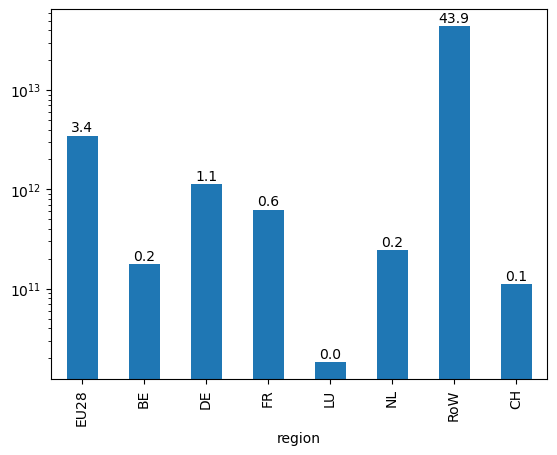

In [16]:
# Comparaison avec les autres régions, total
GWP = io_LU.impacts.D_cba_reg.loc[ind]
scale = 1e12
ax = GWP.plot.bar()
ax.set_yscale('log')
for i,row in enumerate(GWP.items()):
    ax.annotate(f'{row[1]/scale:.1f}',(i,row[1]*1.1), ha='center')

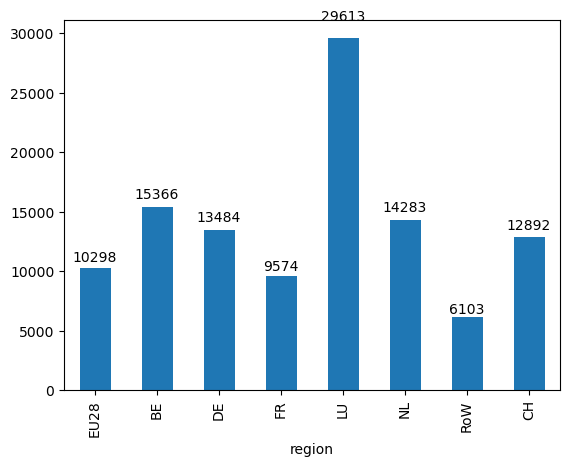

In [17]:
# Comparaison avec les autres régions, per capita
GWP = io_LU.impacts.D_cba_cap.loc[ind]
scale = 1
ax = GWP.plot.bar()
for i,row in enumerate(GWP.items()):
    ax.annotate(f'{row[1]/scale:.0f}',(i,row[1]*1.05), ha='center')

## Part des transactions liée à la demande du Luxembourg

Calculons maintenant les interactions entre pays dues à la demande finale du Luxembourg. La formule pour le calcul qui nous intéresse est $$GHG_{cons pro LU}=\widehat{S_{GWP100}}L\widehat{y_{LU}}$$

Nous calculerons aussi la "cartographie" de l'ensemble des émissions liées aux échanges mondiaux.
$$GHG_{cons pro}=\widehat{S_{GWP100}}L\widehat{y}$$

### Calcul en partant de la table complète (non-agrégée)
Le protocole ici prend en compte la résolution économique et régionale la plus fine, calcule les émissions liées aux échanges internationaux, et seulement à la fin, les agrège avec la résolution désirée.

In [18]:
GHG_cons_pro_full   = io.L.multiply(io.impacts.S.loc[ind],axis=0).dot(io.Y.groupby('region',axis=1).sum()).groupby('region',axis=0).sum()

F_Y_agg = io.impacts.F_Y.groupby(level='region',axis=1).sum().loc[ind].groupby(reg_agg_dict).sum()

GHG_cons_pro_agg_FD = pd.DataFrame(np.diag(F_Y_agg), index=F_Y_agg.index, columns=F_Y_agg.index)

GHG_cons_pro_agg    = GHG_cons_pro_full.groupby(reg_agg_dict).sum().groupby(reg_agg_dict, axis=1).sum()

In [19]:
io.impacts.F_Y.loc[ind,'LU'].sum()

1177342612.0764

In [20]:
Y_LU = io.Y['LU'].sum(1)

GHG_cons_pro_LU_full   = io.L.multiply(io.impacts.S.loc[ind],axis=0).multiply(Y_LU).groupby('region', axis=1).sum().groupby('region', axis=0).sum()
GHG_cons_pro_LU_agg    = GHG_cons_pro_LU_full.groupby(reg_agg_dict).sum().groupby(reg_agg_dict, axis=1).sum()

GHG_cons_pro_LU_agg_FD = GHG_cons_pro_LU_agg.copy()
GHG_cons_pro_LU_agg_FD.loc[:,:] = 0
GHG_cons_pro_LU_agg_FD.loc['LU','LU'] = io.impacts.F_Y.loc[ind,'LU'].sum()


### Calcul avec la table agrégée
Le protocole ici utilise la table économique agrégée (secteurs et régions), puis seulement ensuite calcule les émissions liées aux échanges internationaux.

In [21]:
Y_LU = io_LU.Y['LU'].sum(1)

In [22]:
GHG_cons_pro_LU = io_LU.L.multiply(io_LU.impacts.S.loc[ind],axis=0).multiply(Y_LU)
GHG_cons_pro = io_LU.L.multiply(io_LU.impacts.S.loc[ind],axis=0).multiply(io_LU.Y.sum(1))

In [23]:
GHG_cons_pro_LU.loc[:,('TOTAL','TOTAL')] = GHG_cons_pro_LU.sum(1)
GHG_cons_pro_LU.loc[('TOTAL','TOTAL'),:] = GHG_cons_pro_LU.sum(0)

GHG_cons_pro.loc[:,('TOTAL','TOTAL')] = GHG_cons_pro.sum(1)
GHG_cons_pro.loc[('TOTAL','TOTAL'),:] = GHG_cons_pro.sum(0)

In [24]:
Y_LU = io_LU.Y.copy()

for r in io_LU.get_regions():
    if r != 'LU':
        Y_LU[r] = 0

In [25]:
x_LU = io_LU.L.dot(io_LU.Y['LU']).sum(axis=1)
x_LU

region  sector                                                                                                                   
EU28    Agriculture, forestry and fishing                                                                                             421.459020
        Mining and quarrying                                                                                                          220.292784
        Manufacturing                                                                                                                6025.857688
        Information and communication                                                                                                 302.837572
        Water supply; sewerage, waste management and remediation activities                                                           214.439500
                                                                                                                                        ...     


In [26]:
Z_LU = io_LU.A.mul(x_LU, axis=1)

C:\Users\Gibon\.conda\envs\io\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='region-sector', ylabel='region-sector'>

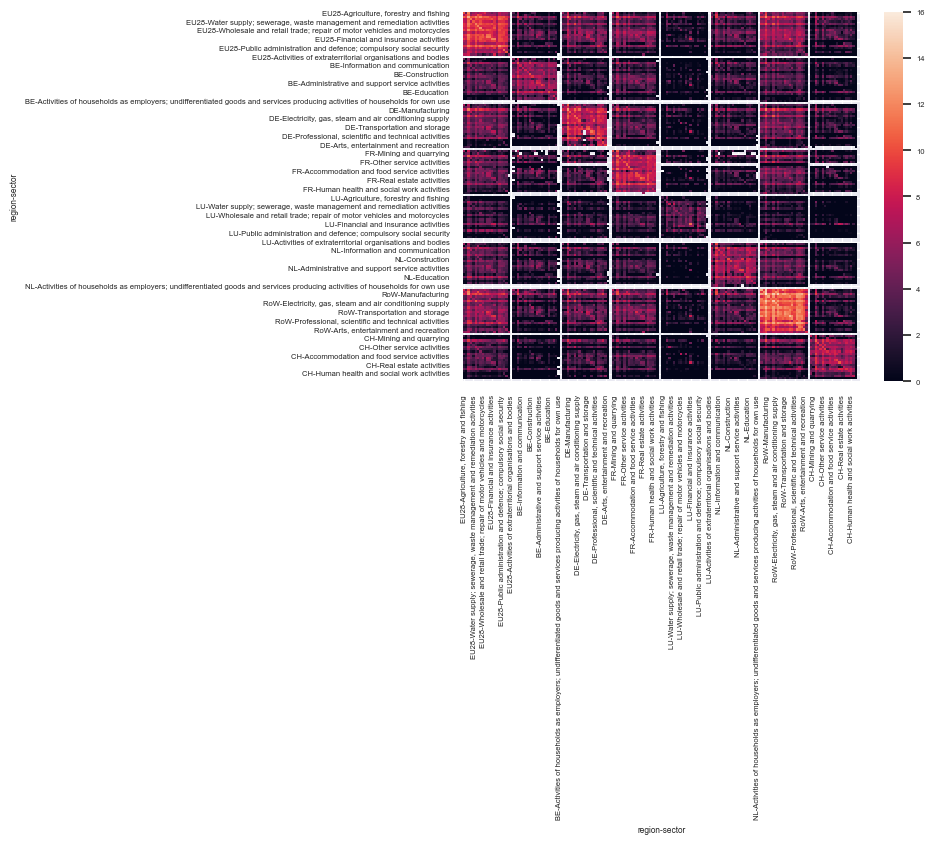

In [27]:
# fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=0.5)
sns.heatmap(np.log(io_LU.Z), vmin=0, vmax=16)

C:\Users\Gibon\.conda\envs\io\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='region-sector', ylabel='region-sector'>

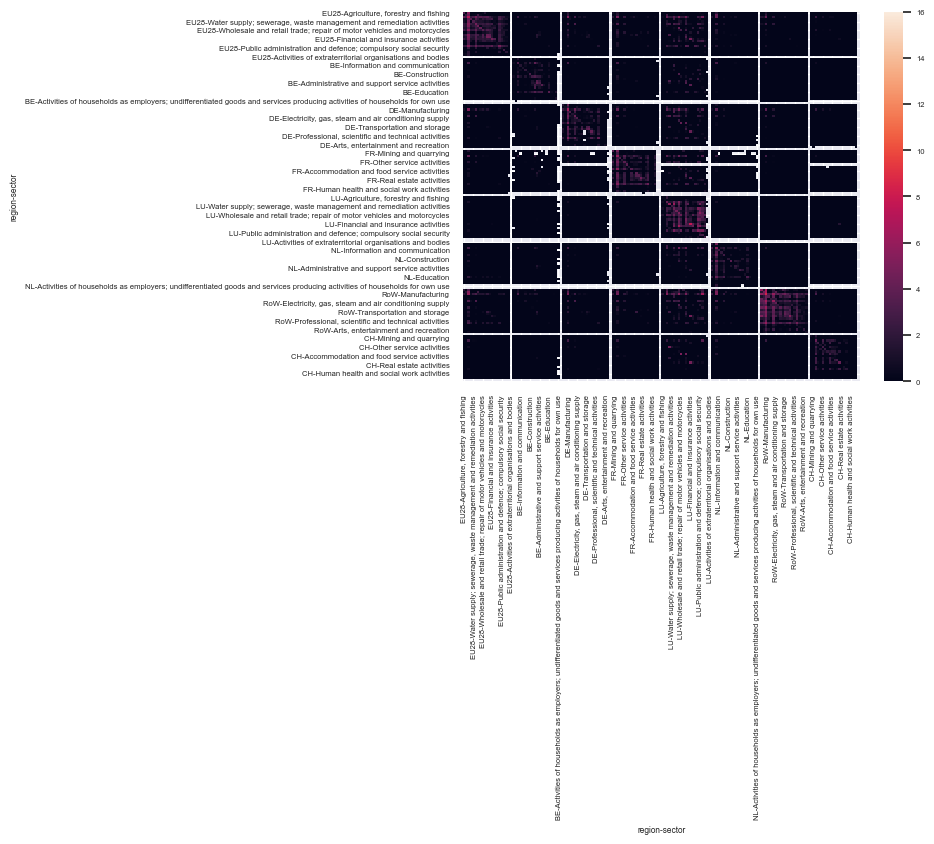

In [28]:
sns.heatmap(np.log(Z_LU), vmin=0, vmax=16)

In [29]:
GHG_cons_pro_FD=pd.DataFrame(np.diag(io_LU.impacts.F_Y.groupby(level='region',axis=1).sum().loc[ind]),
                             index=GHG_cons_pro_LU.index.levels[0][:-1],
                             columns=GHG_cons_pro_LU.columns.levels[0][:-1])

GHG_cons_pro_LU_FD=GHG_cons_pro_FD.copy()
GHG_cons_pro_LU_FD.loc[:,:]=0
GHG_cons_pro_LU_FD.loc['LU','LU']=GHG_cons_pro_FD.loc['LU','LU']

GHG_cons_pro_FD['TOTAL']     = GHG_cons_pro_FD.sum(1)
GHG_cons_pro_FD.loc['TOTAL'] = GHG_cons_pro_FD.sum()

GHG_cons_pro_LU_FD['TOTAL']    = GHG_cons_pro_LU_FD.sum(1)
GHG_cons_pro_LU_FD.loc['TOTAL'] = GHG_cons_pro_LU_FD.sum()

GHG_cons_pro_LU_tot = GHG_cons_pro_LU.groupby(level='region',axis=1).sum().groupby(level='region',axis=0).sum()+GHG_cons_pro_LU_FD
GHG_cons_pro_tot    = GHG_cons_pro.groupby(level='region',axis=1).sum().groupby(level='region',axis=0).sum()+GHG_cons_pro_FD

In [30]:
GHG_summary = (GHG_cons_pro_agg + GHG_cons_pro_agg_FD)
# GHG_summary = GHG_cons_pro_tot.drop('TOTAL').drop('TOTAL', axis=1)

GHG_summary *= 1e-9 # convert to Mt

GWP_all_toplot   = GHG_summary.applymap(lambda x: round(x, int(np.floor(1 - np.floor(np.log10(x))))))
GWP_prod_toplot  = [*zip(GHG_summary.sum(1).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x)))))))]
GWP_cons_toplot  = [GHG_summary.sum(0).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x))))))]
GWP_total_toplot = [pd.Series(GHG_summary.sum().sum()).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x))))))]

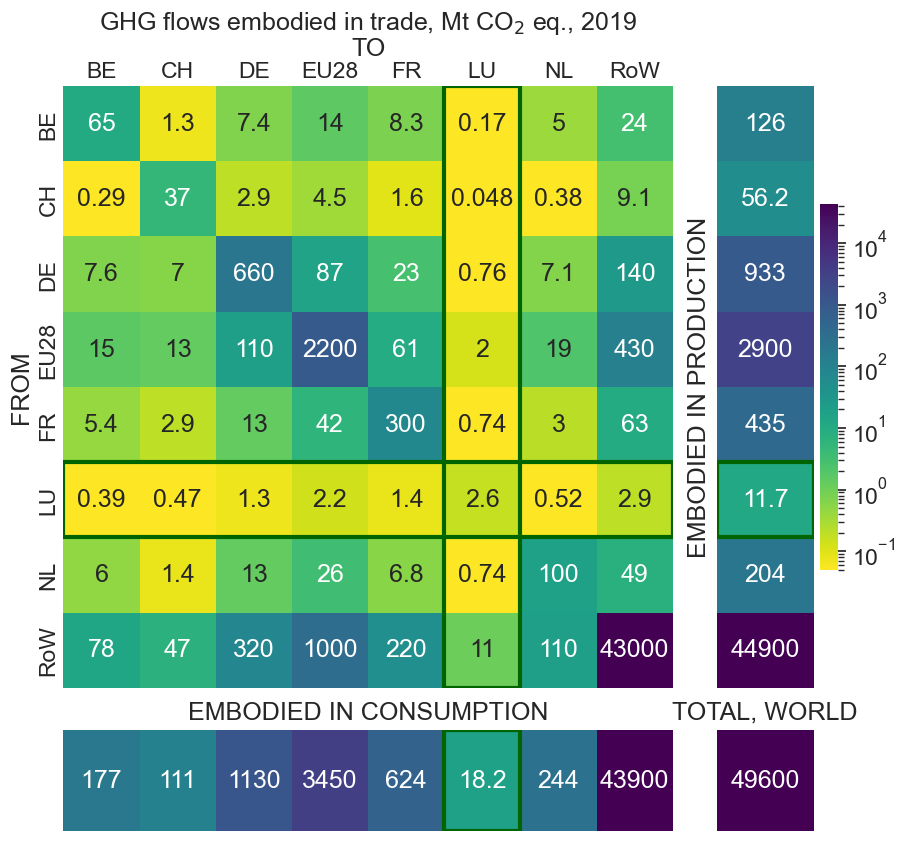

In [31]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(ncols=2,
                       nrows=2,
                       figsize=(10, 745/88),
                       subplot_kw={'facecolor':'w'},
                       gridspec_kw={'width_ratios': [10, 2],
                                    'height_ratios': [10, 745/888*2],
                                    'wspace': 0.12,
                                    'hspace': 0.12,
                                    'bottom': 0})

cmap  = 'viridis_r'


sns.heatmap(GWP_all_toplot, annot=True,
            norm=LogNorm(vmin=1, vmax=GHG_summary.max().max()),
           fmt='g',
            cmap=cmap,
            cbar=False,
           ax=ax[0,0])

sns.heatmap(GWP_prod_toplot, annot=True,
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            
            cmap=cmap,
           fmt='g',
           ax=ax[0,1])

sns.heatmap(GWP_cons_toplot, annot=True,
#             annot_kws={'rotation': 90},
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            cbar=False,
            cmap=cmap,
           fmt='g',
           ax=ax[1,0])

sns.heatmap(GWP_total_toplot, annot=True,
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            cbar=False,
            cmap=cmap,
            yticklabels=[],
            xticklabels=['GLOBAL EMISSIONS'],
           fmt='g',
           ax=ax[1,1])

ax[0,0].set_xlabel('TO')
ax[0,0].xaxis.set_label_position('top')
ax[0,0].set_ylabel('FROM')
ax[0,0].set_title('GHG flows embodied in trade, Mt CO$_2$ eq., 2019')
ax[0,0].xaxis.tick_top()
ax[0,0].tick_params(axis=u'both', which=u'both',length=0)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel('EMBODIED IN PRODUCTION')

ax[1,1].set_xlabel('')
ax[1,1].set_xticks([])
ax[1,1].set_xlabel('TOTAL, WORLD',labelpad=8)
ax[1,1].xaxis.set_label_position('top') 

ax[1,0].set_xlabel('EMBODIED IN CONSUMPTION',labelpad=8)
ax[1,0].xaxis.set_label_position('top') 
ax[1,0].set_ylabel('')
ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
ax[1,0].set_xticks([])

hili=5
ax[0,0].add_patch(Rectangle((0, hili), 8, 1, fill=False, edgecolor='darkgreen', lw=3))
ax[0,0].add_patch(Rectangle((hili, 0), 1, 8, fill=False, edgecolor='darkgreen', lw=3))
ax[0,1].add_patch(Rectangle((0, hili), 1, 1, fill=False, edgecolor='darkgreen', lw=3))
ax[1,0].add_patch(Rectangle((hili, 0), 1, 1, fill=False, edgecolor='darkgreen', lw=3))


# resize the corner box
ax01pos = ax[0,1].get_position().bounds
ax11pos = list(ax[1,1].get_position().bounds)
ax11pos[2] = ax01pos[2]
ax[1,1].set_position(ax11pos)

# fig.savefig('GHG_in_trade_{}_FA_wo_LU.svg'.format(year),
#             facecolor='white',
#             edgecolor='none',
#             bbox_inches='tight')

In [32]:
GHG_summary = GHG_cons_pro_LU_agg+GHG_cons_pro_LU_agg_FD

GHG_summary *= 1e-6 # convert to Mt

GWP_all_toplot   = GHG_summary.applymap(lambda x: round(x, int(np.floor(1 - np.floor(np.log10(x))))))
GWP_prod_toplot  = [*zip(GHG_summary.sum(1).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x)))))))]
GWP_cons_toplot  = [GHG_summary.sum(0).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x))))))]
GWP_total_toplot = [pd.Series(GHG_summary.sum().sum()).apply(lambda x: round(x, int(np.floor(2 - np.floor(np.log10(x))))))]

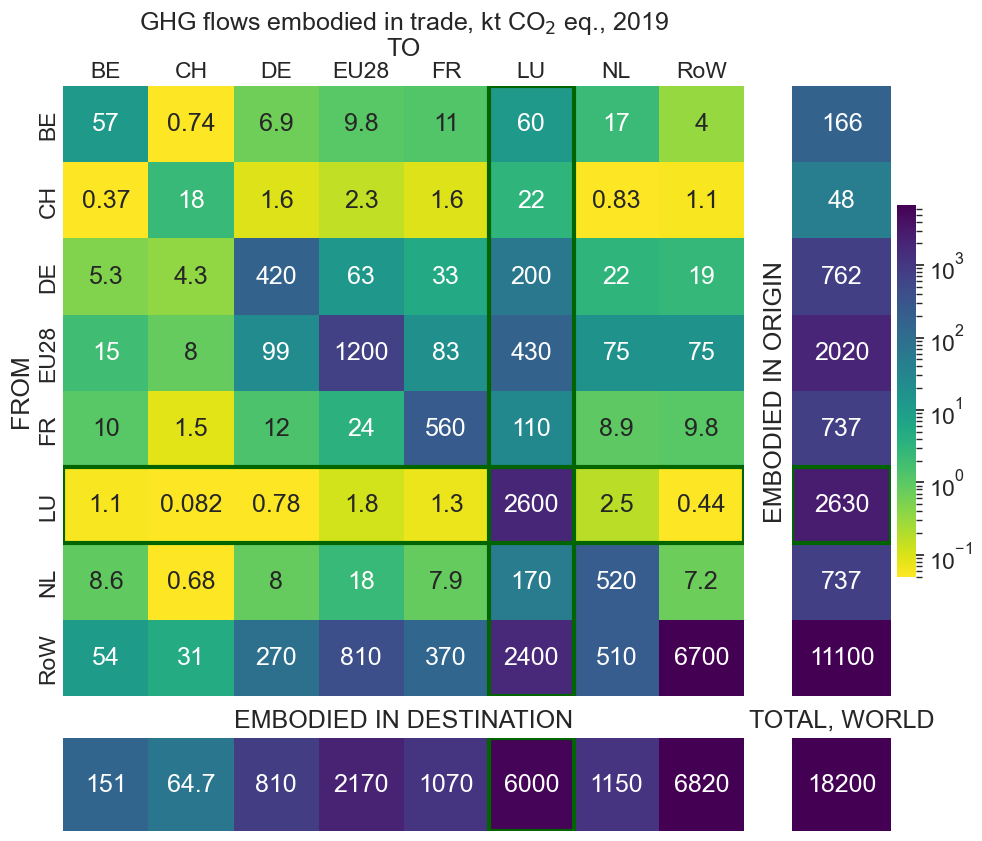

In [33]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(ncols=2,
                       nrows=2,
                       figsize=(11, 745/88),
                       subplot_kw={'facecolor':'w'},
                       gridspec_kw={'width_ratios': [11, 2],
                                    'height_ratios': [11, 745/888*2],
                                    'wspace': 0.12,
                                    'hspace': 0.12,
                                    'bottom': 0})

cmap  = 'viridis_r'


sns.heatmap(GWP_all_toplot, annot=True,
            norm=LogNorm(vmin=1, vmax=GHG_summary.max().max()),
           fmt='g',
            cmap=cmap,
            cbar=False,
           ax=ax[0,0])

sns.heatmap(GWP_prod_toplot, annot=True,
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            
            cmap=cmap,
           fmt='g',
           ax=ax[0,1])

sns.heatmap(GWP_cons_toplot, annot=True,
#             annot_kws={'rotation': 90},
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            cbar=False,
            cmap=cmap,
           fmt='g',
           ax=ax[1,0])

sns.heatmap(GWP_total_toplot, annot=True,
            norm=LogNorm(vmin=.05, vmax=GHG_summary.max().max()),
            cbar=False,
            cmap=cmap,
            yticklabels=[],
            xticklabels=['GLOBAL EMISSIONS'],
           fmt='g',
           ax=ax[1,1])

ax[0,0].set_xlabel('TO')
ax[0,0].xaxis.set_label_position('top')
ax[0,0].set_ylabel('FROM')
ax[0,0].set_title('GHG flows embodied in trade, kt CO$_2$ eq., 2019')
ax[0,0].xaxis.tick_top()
ax[0,0].tick_params(axis=u'both', which=u'both',length=0)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_ylabel('EMBODIED IN ORIGIN')

ax[1,1].set_xlabel('')
ax[1,1].set_xticks([])
ax[1,1].set_xlabel('TOTAL, WORLD',labelpad=8)
ax[1,1].xaxis.set_label_position('top') 

ax[1,0].set_xlabel('EMBODIED IN DESTINATION',labelpad=8)
ax[1,0].xaxis.set_label_position('top') 
ax[1,0].set_ylabel('')
ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
ax[1,0].set_xticks([])

hili=5
ax[0,0].add_patch(Rectangle((0, hili), 8, 1, fill=False, edgecolor='darkgreen', lw=3))
ax[0,0].add_patch(Rectangle((hili, 0), 1, 8, fill=False, edgecolor='darkgreen', lw=3))
ax[0,1].add_patch(Rectangle((0, hili), 1, 1, fill=False, edgecolor='darkgreen', lw=3))
ax[1,0].add_patch(Rectangle((hili, 0), 1, 1, fill=False, edgecolor='darkgreen', lw=3))


# resize the corner box
ax01pos = ax[0,1].get_position().bounds
ax11pos = list(ax[1,1].get_position().bounds)
ax11pos[2] = ax01pos[2]
ax[1,1].set_position(ax11pos)

# fig.savefig('GHG_in_trade_{}_FA_wo_LU.svg'.format(year),
#             facecolor='white',
#             edgecolor='none',
#             bbox_inches='tight')

In [39]:
# PIB approche consommation
PIB_cons = (io_LU.Y.loc['LU'].sum(1) + io_LU.Z.loc['LU'].sum(1) - io_LU.Z.loc['LU','LU'].sum(1) - (io_LU.Z['LU'].sum() - io_LU.Z.loc['LU','LU'].sum()))
PIB_cons

sector
Agriculture, forestry and fishing                                                                                              113.673754
Mining and quarrying                                                                                                            84.133555
Manufacturing                                                                                                                 4255.224647
Information and communication                                                                                                   -6.154731
Water supply; sewerage, waste management and remediation activities                                                            620.101020
Other service activities                                                                                                      4852.832900
Electricity, gas, steam and air conditioning supply                                                                           -246.810535
Construction               

In [40]:
# PIB approche revenu
PIB_rev = io_LU.satellite.F.iloc[:9].sum()['LU']
PIB_rev

sector
Agriculture, forestry and fishing                                                                                              166.752827
Mining and quarrying                                                                                                           102.616086
Manufacturing                                                                                                                 2798.571172
Information and communication                                                                                                 2652.470371
Water supply; sewerage, waste management and remediation activities                                                            602.014215
Other service activities                                                                                                      2181.442303
Electricity, gas, steam and air conditioning supply                                                                            230.977017
Construction               

In [46]:
PIB_empreinte_LU = pd.concat([PIB_rev,
                              io_LU.impacts.S.loc[ind,'LU'] * 1e-6,
                           io_LU.impacts.M.loc[ind,'LU'] * 1e-6],
                             axis=1,
                            keys=['PIB (M€)','Émissions directes de GES (kt CO2 eq./M€)',
                                 'Empreinte GES (kt CO2 eq./M€)']).dropna().sort_values(by='Empreinte GES (kt CO2 eq./M€)', ascending=False)

PIB_empreinte_LU['Émissions indirectes de GES (kt CO2 eq./M€)'] = PIB_empreinte_LU['Empreinte GES (kt CO2 eq./M€)'] - PIB_empreinte_LU['Émissions directes de GES (kt CO2 eq./M€)']
PIB_empreinte_LU

,PIB (M€),Émissions directes de GES (kt CO2 eq./M€),Empreinte GES (kt CO2 eq./M€),Émissions indirectes de GES (kt CO2 eq./M€)
sector,,,,
"Agriculture, forestry and fishing",166.752827,3.104167,3.596240,0.492074
"Water supply; sewerage, waste management and remediation activities",602.014215,0.998477,1.364214,0.365737
Transportation and storage,4908.910740,0.748918,0.926177,0.177259
Manufacturing,2798.571172,0.055868,0.795984,0.740116
"Electricity, gas, steam and air conditioning supply",230.977017,0.222821,0.585042,0.362220
Mining and quarrying,102.616086,0.243665,0.406980,0.163315
Accommodation and food service activities,1497.578769,0.017216,0.394211,0.376996
Human health and social work activities,2473.576837,0.004957,0.338876,0.333920
Other service activities,2181.442303,0.011121,0.214053,0.202932


In [128]:
scale = np.linspace(0,20,21)
scale

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

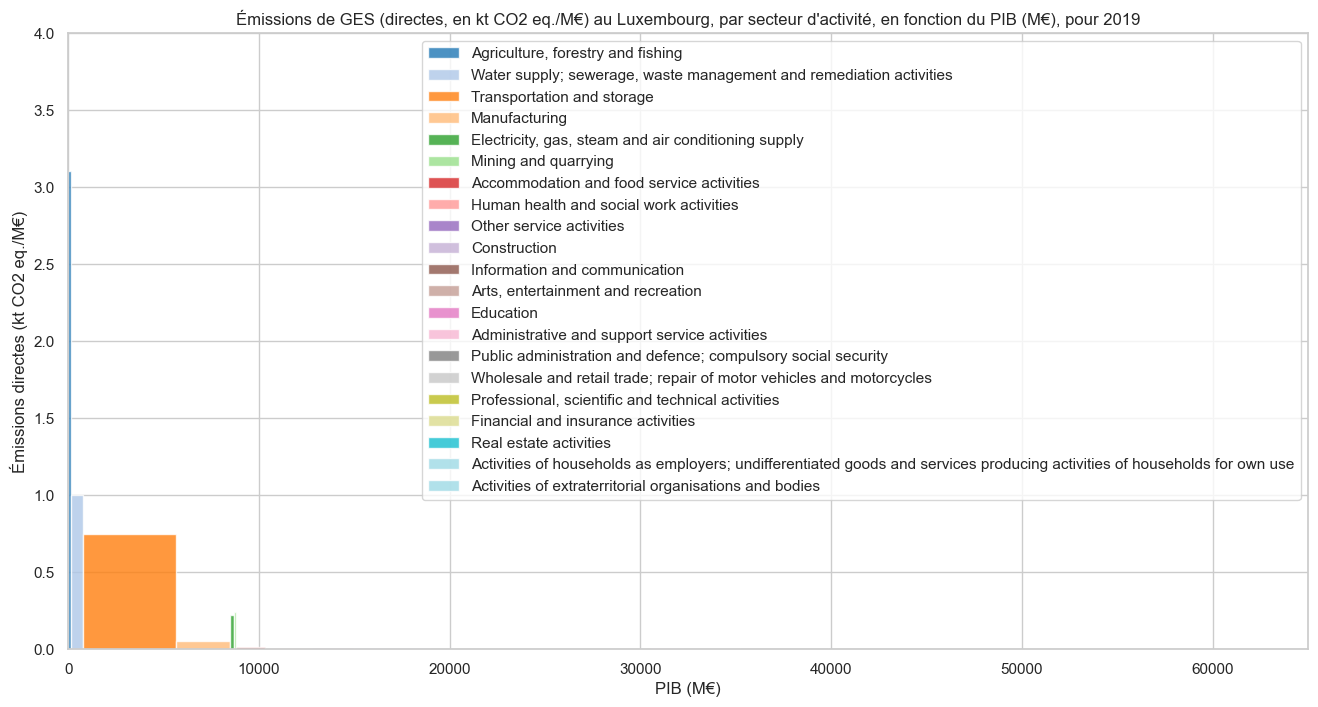

In [131]:
sns.set(font_scale=1)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))

# xpos = [0] + PIB_empreinte_LU['PIB (M€)'].cumsum().values[:-1].tolist()

y    = PIB_empreinte_LU['Émissions directes de GES (kt CO2 eq./M€)']
w    = PIB_empreinte_LU['PIB (M€)']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
scale = np.linspace(0,20,21)
# scale[-1]=0

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]

a = plt.bar(xticks,
            height = y,
            width = w,
            alpha = 0.8,
           color=my_cmap(rescale(scale)))
# _ = plt.xticks(PIB_empreinte_LU.index, xpos)

# y    = PIB_empreinte_LU['Empreinte GES (kt CO2 eq./M€)']

# b = plt.bar(xticks,
#             height = y,
#             width = w,
#             alpha = 0.3,
#            color=my_cmap(rescale(scale)))

plt.legend(a.patches, PIB_empreinte_LU.index)

plt.ylim((0,4))
plt.xlim((0,65000))
plt.ylabel('Émissions directes (kt CO2 eq./M€)')
plt.xlabel('PIB (M€)')
plt.title('Émissions de GES (directes, en kt CO2 eq./M€) au Luxembourg, par secteur d\'activité, en fonction du PIB (M€), pour 2019')

plt.savefig('data/GES_direct_PIB_LU_2019_png', dpi=300)

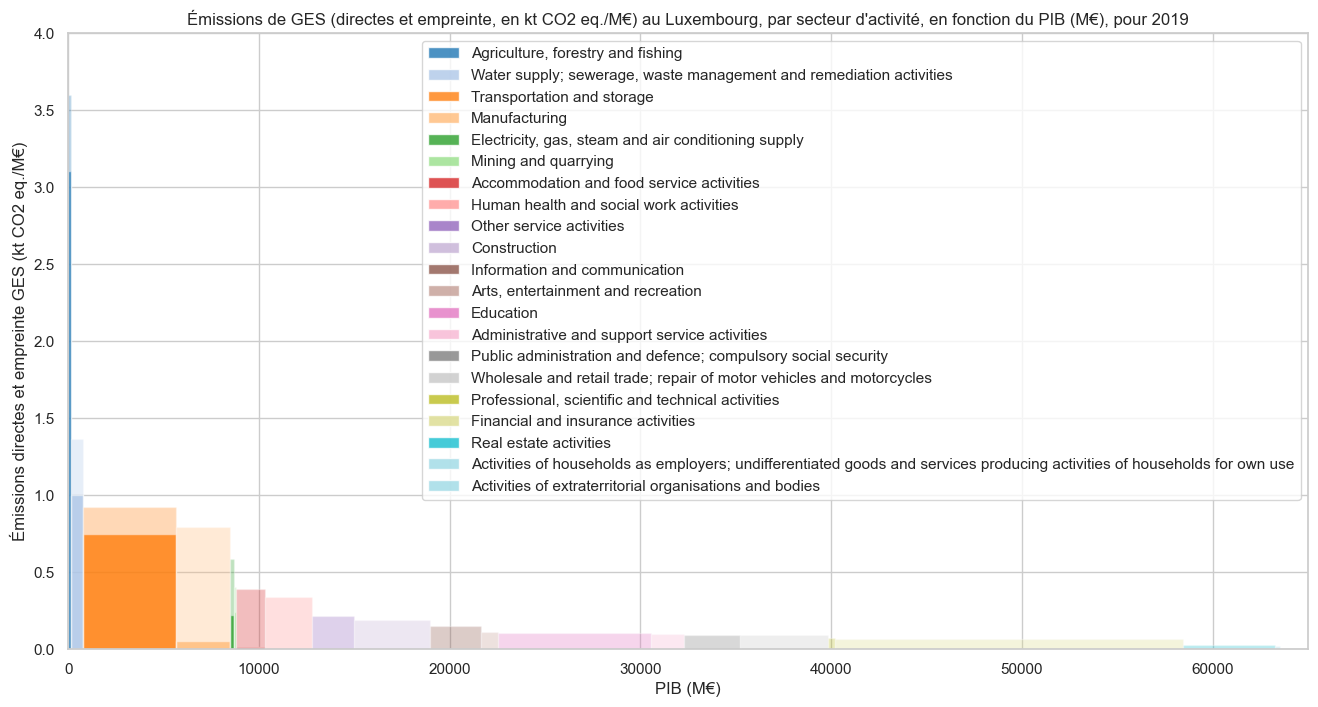

In [132]:
sns.set(font_scale=1)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,8))

# xpos = [0] + PIB_empreinte_LU['PIB (M€)'].cumsum().values[:-1].tolist()

y    = PIB_empreinte_LU['Émissions directes de GES (kt CO2 eq./M€)']
w    = PIB_empreinte_LU['PIB (M€)']

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]

a = plt.bar(xticks,
            height = y,
            width = w,
            alpha = 0.8,
           color=my_cmap(rescale(scale)))
# _ = plt.xticks(PIB_empreinte_LU.index, xpos)

y    = PIB_empreinte_LU['Empreinte GES (kt CO2 eq./M€)']

b = plt.bar(xticks,
            height = y,
            width = w,
            alpha = 0.3,
           color=my_cmap(rescale(scale)))

plt.legend(a.patches, PIB_empreinte_LU.index)

plt.ylim((0,4))
plt.xlim((0,65000))
plt.ylabel('Émissions directes et empreinte GES (kt CO2 eq./M€)')
plt.xlabel('PIB (M€)')
plt.title('Émissions de GES (directes et empreinte, en kt CO2 eq./M€) au Luxembourg, par secteur d\'activité, en fonction du PIB (M€), pour 2019')

plt.savefig('data/GES_empreinte_PIB_LU_2019_png', dpi=300)